In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [3]:
ticker ='AAPL'
data=pd.DataFrame()
data[ticker]=wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [4]:
log_returns=np.log(1 + data.pct_change())# getting simple returns

In [5]:
log_returns.tail()

,AAPL
Date,
2019-08-14,-0.030217
2019-08-15,-0.004994
2019-08-16,0.023321
2019-08-19,0.018472
2019-08-20,0.005783


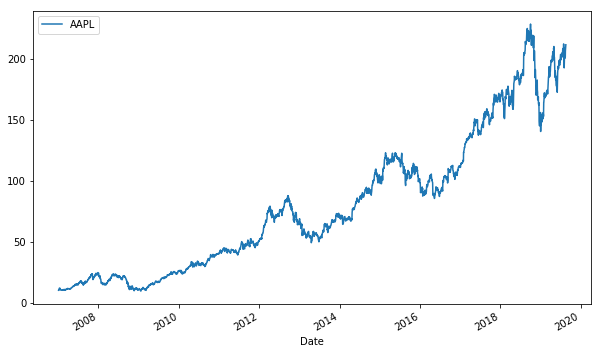

In [6]:
data.plot(figsize=(10,6))

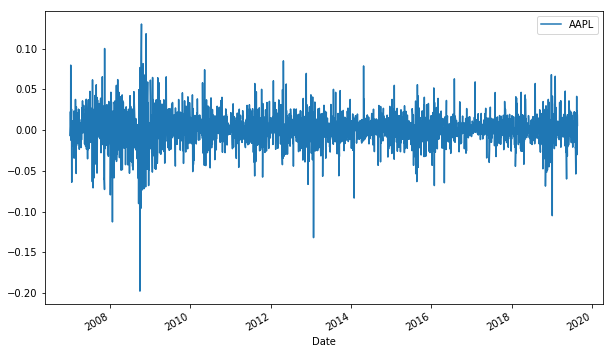

In [7]:
log_returns.plot(figsize=(10,6))# picture shows normally distributed and has stable mean

In [8]:
u=log_returns.mean()

In [9]:
var=log_returns.var()

In [10]:
drift=u-(.5*var)# calcualting drift

In [11]:
stdev=log_returns.std()

brownian motion= drift+ stdev*e^r


In [12]:
type(drift)

pandas.core.series.Series

In [13]:
type(stdev)

pandas.core.series.Series

In [14]:
np.array(drift)# changing to an array

array([0.00074899])

In [15]:
drift.values# changing to an array

array([0.00074899])

In [16]:
stdev.values

array([0.01986347])

In [17]:
norm.ppf(.95)# event has 95% chance of occuring, is 1.6 stdev from mean

1.6448536269514722

In [18]:
x=np.random.rand(10,2)

In [19]:
norm.ppf(x)# distance from mean for each of random gen probabilties

array([[-0.84261108, -0.7682328 ],
       [-1.9161917 ,  0.07842614],
       [ 0.4569381 , -0.40084932],
       [ 0.2713045 , -0.23249815],
       [-0.40405983, -1.49543201],
       [ 0.47743788, -0.38586352],
       [-0.54306688, -0.15677424],
       [-0.44397668,  0.55004004],
       [-0.84991702, -0.49544464],
       [-0.54497614,  0.59162805]])

In [20]:
z=norm.ppf(np.random.rand(10,2))

In [21]:
t_intervals=1000
iterations=10

In [25]:
daily_returns=np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))

In [26]:
daily_returns

array([[1.0240131 , 0.98600343, 1.03283697, ..., 1.0010592 , 0.96873011,
        1.02838866],
       [0.95554701, 1.01306143, 1.03350623, ..., 0.98514389, 0.98588133,
        1.03160035],
       [1.00686237, 1.00045881, 1.00641455, ..., 0.98157049, 1.01615795,
        0.96421966],
       ...,
       [1.01699557, 1.00930128, 0.98279592, ..., 1.0075316 , 0.97724789,
        1.00973912],
       [1.02133163, 1.06292586, 0.9953597 , ..., 1.01433848, 0.9948166 ,
        1.0230661 ],
       [0.96572887, 1.00037204, 0.97527788, ..., 0.99456167, 1.00070251,
        1.00983516]])

In [27]:
s0=data.iloc[-1]# need last value of table, aka first stock price in list

In [28]:
price_list=np.zeros_like(daily_returns)# creating a 10x1000 array and fill with 0s

In [29]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
price_list[0]=s0#replaceing 0s with exp stock prices by using loop

In [31]:
for t in range(1,t_intervals):# creating loop that starts at day 1, ends at 1000
    price_list[t]=price_list[t-1]*daily_returns[t]

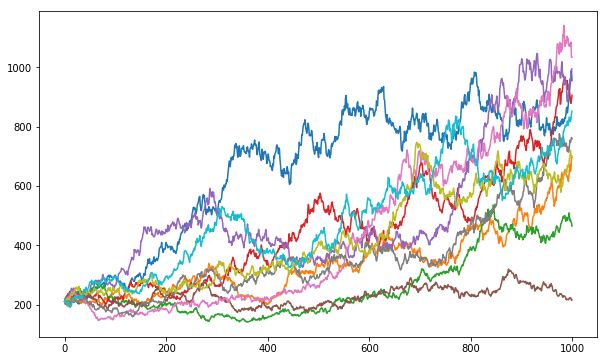

In [32]:
plt.figure(figsize=(10,6))
plt.plot(price_list);